Dataset needed: Tennis weather from within (https://computersciencesource.wordpress.com/2010/01/28/year-2-machine-learning-naive-bayes-classifier/)

## Naïve Bayes

Train a Naïve Bayes model on the datset that appears as a table in the referenced URL.

In [50]:
library(e1071)
library(dplyr)

In [51]:
read.tennis = function(file){
  ## Read the csv file
  tennis <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)
}
tennis = read.tennis(file='tennis.csv')

In [52]:
str(tennis)

'data.frame':	14 obs. of  6 variables:
 $ Day         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Outlook     : chr  "Sunny" "Sunny" "Overcast" "Rain" ...
 $ Temperature : chr  "Hot" "Hot" "Hot" "Mild" ...
 $ Humidity    : chr  "High" "High" "High" "High" ...
 $ Wind        : chr  "Weak" "Strong" "Weak" "Weak" ...
 $ Play.Tennis.: chr  "No" "No" "Yes" "Yes" ...


In [53]:
colnames(tennis)[6] = "Play.Tennis"
tennis2 = select(tennis, -Day)

In [54]:
str(tennis2)

'data.frame':	14 obs. of  5 variables:
 $ Outlook    : chr  "Sunny" "Sunny" "Overcast" "Rain" ...
 $ Temperature: chr  "Hot" "Hot" "Hot" "Mild" ...
 $ Humidity   : chr  "High" "High" "High" "High" ...
 $ Wind       : chr  "Weak" "Strong" "Weak" "Weak" ...
 $ Play.Tennis: chr  "No" "No" "Yes" "Yes" ...


In [55]:
tennis2$Play.Tennis = as.numeric(tennis2$Play.Tennis == "Yes")

In [56]:
tennis.NB = naiveBayes(Play.Tennis ~., data = tennis2)
tennis.NB


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.3571429 0.6428571 

Conditional probabilities:
   Outlook
Y    Overcast      Rain     Sunny
  0 0.0000000 0.4000000 0.6000000
  1 0.4444444 0.3333333 0.2222222

   Temperature
Y        Cool       Hot      Mild
  0 0.2000000 0.4000000 0.4000000
  1 0.3333333 0.2222222 0.4444444

   Humidity
Y        High    Normal
  0 0.8000000 0.2000000
  1 0.3333333 0.6666667

   Wind
Y      Strong      Weak
  0 0.6000000 0.4000000
  1 0.3333333 0.6666667


In [57]:
tennis2$Outlook = as.numeric(tennis2$Outlook == "Sunny")
tennis2$Temperature = as.numeric(tennis2$Temperature == "Hot")
tennis2$Humidity = as.numeric(tennis2$Humidity == "High")
tennis2$Wind = as.numeric(tennis2$Wind == "Weak")

In [58]:
threshold = 0.5
predictprob.NB = predict(tennis.NB, newdata = tennis2, type = 'raw')

In [59]:
threshold = 0.5
actual = ifelse(tennis2$Play.Tennis, 1, 0)
predict.NB = ifelse(predictprob.NB[,2] > threshold, 1,0)

In [60]:
confusionNB = table(predict.NB, actual, dnn =c("Predicted", "Actual"))
Accuracy = sum(confusionNB[c(1,4)])/sum(confusionNB)
print(confusionNB)
print(" ")
print(Accuracy)
                    

         Actual
Predicted 0 1
        0 3 3
        1 2 6
[1] " "
[1] 0.6428571


### The accuracy of the above trained model is only 64%

##  Bayesian Nets

Shingles is a possible cause of nerve damage and is also an explanation for increased blood pressure. In turn, either of these could cause a stroke. Severe headaches could also be explained by nerve damage.

a: shingles
b: increased blood pressure
c: nerve damage
d: stroke
e: severe headaches

Create a Bayesian net that captures these relationships.

Use these probabilities:  P(a)=0.2,P(b|a)=0.75,P(b|¬a) = 0.25,P(c|a)=0.2,Pr(c|¬a)=0.05, P(e|c)=0.8,Pr(e|¬c)=0.6, P (d|b∧c)=0.8,P(d|b∧ ¬c)=0.8,P(d|¬b ∧ c)=0.8,P(d|¬b ∧ ¬c)=0.05

Train this dataset. Predict value of ) P(shingles|¬severe headaches)

# Bayesian network for shingles

In [61]:
library(bnlearn)

In [62]:
shingles = empty.graph(letters[1:5])
shingles


  Random/Generated Bayesian network

  model:
   [a][b][c][d][e] 
  nodes:                                 5 
  arcs:                                  0 
    undirected arcs:                     0 
    directed arcs:                       0 
  average markov blanket size:           0.00 
  average neighbourhood size:            0.00 
  average branching factor:              0.00 

  generation algorithm:                  Empty 


In [63]:
arc.set = matrix(c("a", "c", "a", "b", "c", "d", "b","d","c","e"),
            ncol = 2, byrow = TRUE,
            dimnames = list(NULL, c("from", "to")))
arc.set

from,to
a,c
a,b
c,d
b,d
c,e


In [64]:
arcs(shingles) = arc.set
shingles


  Random/Generated Bayesian network

  model:
   [a][b|a][c|a][d|b:c][e|c] 
  nodes:                                 5 
  arcs:                                  5 
    undirected arcs:                     0 
    directed arcs:                       5 
  average markov blanket size:           2.40 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


In [65]:
shingles.dag = model2network("[a][b|a][c|a][d|b:c][e|c]")

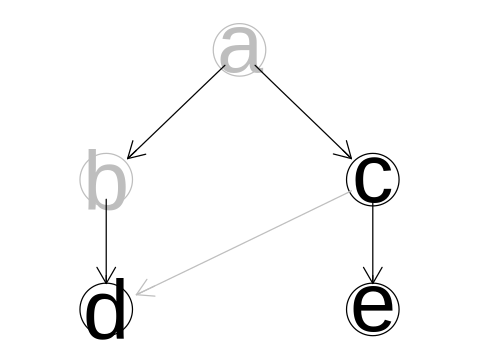

In [66]:
options(repr.plot.width = 4, repr.plot.height = 3)
hlight = list(nodes = c("a", "b"),arcs = c("c", "d"),col = "grey",textCol = "grey")
pp = graphviz.plot(shingles.dag, highlight = hlight)

In [67]:
shingles.dag = model2network("[a][b|a][c|a][d|b:c][e|c]")
lv = c("yes", "no")
a.prob = array(c(0.2, 0.8), dim = 2, dimnames = list(a = lv))
b.prob = array(c(0.75, 0.25,0.25,0.75), dim = c(2,2), dimnames = list(b= lv, a = lv))
c.prob = array(c(0.2,0.8, 0.05,0.95), dim = c(2,2), dimnames = list(c = lv, a = lv))
e.prob = array(c(0.8,0.2,0.6,0.4), dim = c(2,2), dimnames = list(e = lv, c = lv))
d.prob = array(c(0.8, 0.2, 0.8, 0.2, 0.8,0.2, 0.05, 0.95), dim = c(2, 2, 2),dimnames = list(d = lv, c = lv, b = lv))
cpt = list(a = a.prob, b = b.prob, c = c.prob, d = d.prob, e = e.prob)
bn = custom.fit(shingles.dag, cpt)

In [68]:
bn


  Bayesian network parameters

  Parameters of node a (multinomial distribution)

Conditional probability table:
 a
yes  no 
0.2 0.8 

  Parameters of node b (multinomial distribution)

Conditional probability table:
 
     a
b      yes   no
  yes 0.75 0.25
  no  0.25 0.75

  Parameters of node c (multinomial distribution)

Conditional probability table:
 
     a
c      yes   no
  yes 0.20 0.05
  no  0.80 0.95

  Parameters of node d (multinomial distribution)

Conditional probability table:
 
, , c = yes

     b
d      yes   no
  yes 0.80 0.80
  no  0.20 0.20

, , c = no

     b
d      yes   no
  yes 0.80 0.05
  no  0.20 0.95


  Parameters of node e (multinomial distribution)

Conditional probability table:
 
     c
e     yes  no
  yes 0.8 0.6
  no  0.2 0.4


P(shingles|$\neg$severe headaches), that is the probability of having shingles without severe
headaches should be the equal to the probability of having shingles without nerve damage, since nerve damage from shingles causes headaches. From the above conditional probability tables,
P(shingles|$\neg$nerve damage) = 0.25. So P(shingles|$\neg$headache = 0.25.